In [23]:
# year (0), games played (1), wins (2), losses (3), runs (4), at bats (5), 
# hits by batters (6), doubles (7), triples (8), homeruns (9), walks (10), 
# strikeouts (11), stolen bases (12), opponents runs scored (13), 
# earned runs allowed (14), earned run average (15), hits allowed (16),
# homeruns allowed (17), walks allowed (18), strikeouts by pitchers (19), errors (20)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Y is the dependent variable
# X is the independent variable 

def ols_regression( Y, X ):
    
    # n = number of samples
    n = np.size( Y, 0 )
    
    # make things a bit easier
    SUM_XY = np.sum( np.multiply( X, Y ) )
    SUMX_SUMY = np.sum( X ) * np.sum( Y )
    SUM_X2 = np.sum( np.multiply( X, X ) )
    SUM_Y2 = np.sum( np.multiply( Y, Y ) )
    SUM_X_2 = np.sum( X )**2
    SUM_Y_2 = np.sum( Y )**2
    
    #mean of X and Y
    Xbar = np.mean( X )
    Ybar = np.mean( Y )
    
    # estimate the regression coefficents
    b = ( ( n * SUM_XY ) - ( SUMX_SUMY ) ) / ( ( n* SUM_X2) - SUM_X_2 )
    a = Ybar - b*Xbar
    
    r = ( SUM_XY - (1/n)*SUMX_SUMY ) / np.sqrt( ( SUM_X2 - (1/n)*SUM_X_2 )*( SUM_Y2 - (1/n)*SUM_Y_2 ) )

    return a,b,r

In [26]:
stats = np.genfromtxt( "../data/teams_raw.csv", delimiter=",")

idx = stats[:,0] > 1999

stats_2X = stats[idx,:]


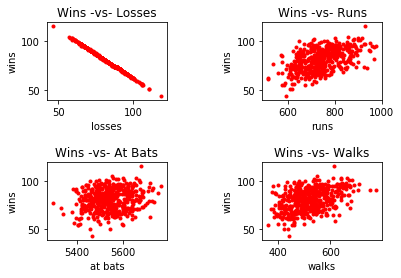

In [27]:
fig,axs= plt.subplots(2,2)
fig.subplots_adjust(hspace=0.8, wspace=0.8)

axs[0,0].set_title( "Wins -vs- Losses")
axs[0,0].set(xlabel="losses", ylabel="wins")
axs[0,0].scatter( stats_2X[:,3], stats_2X[:,2], color='red', marker='.' )

axs[0,1].set_title( "Wins -vs- Runs")
axs[0,1].set(xlabel="runs", ylabel="wins")
axs[0,1].scatter( stats_2X[:,4], stats_2X[:,2], color='red', marker='.' )

axs[1,0].set_title( "Wins -vs- At Bats")
axs[1,0].set(xlabel="at bats", ylabel="wins")
axs[1,0].scatter( stats_2X[:,5], stats_2X[:,2], color='red', marker='.' )

axs[1,1].set_title( "Wins -vs- Walks")
axs[1,1].set(xlabel="walks", ylabel="wins")
axs[1,1].scatter( stats_2X[:,10], stats_2X[:,2], color='red', marker='.' )

Yhat = 79.33 + 0.02X
r = 0.05


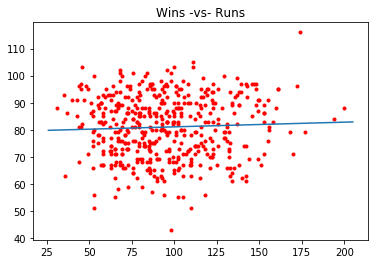

In [28]:
X = stats_2X[:,12] # runs
Y = stats_2X[:,2] # wins

a,b,r = ols_regression( Y, X )

# Yhat = a + bX
print( "Yhat = {0:0.2f} + {1:0.2f}X".format( a, b ) )
print( "r = {0:0.2f}".format( r ) )

Xp = np.linspace( np.min(X - 5), np.max( X + 5 ) )
Yhat = a + b*Xp

plt.figure()
plt.plot( Xp, Yhat )
plt.title( "Wins -vs- Runs")
plt.scatter( X, Y, color='red', marker='.' )
plt.show()